In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import citipy
import requests
requests.__version__
from datetime import datetime
from config import weather_api_key

### Generate random latitudes and longitudes

In [34]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [35]:
# Add the latitudes and longitudes to a list. -->unzipping
coordinates = list(lat_lngs)
coordinates

[(75.02671199397548, 2.8285792572197295),
 (-57.37648156235222, 112.8249849591964),
 (-40.37921126990947, -105.21608959153059),
 (-88.29203752143724, 123.52292738485716),
 (-4.963255491057367, 100.17726825833165),
 (-69.66697756286251, 90.73062859581131),
 (-50.95610711566743, 101.95328960455771),
 (52.7855394916121, 137.39522080601967),
 (-31.604338183986165, 26.145479827117725),
 (-66.71521854334084, -19.15418661188687),
 (-40.57754434603139, 87.12993315254636),
 (-44.50408681664484, 2.8526713643013295),
 (12.656978413589712, 106.75097450552926),
 (12.349473590070446, 70.67963593026164),
 (-72.02501501081503, -118.37291638505218),
 (81.86589846533818, 26.94778320100548),
 (76.75995683162196, 99.4914706920539),
 (87.32848237371837, 50.014118083638095),
 (47.39999192237795, 37.773456162143646),
 (-48.51695006630804, 4.339462310835756),
 (47.63298869128957, -42.16023942474797),
 (-8.730484788329804, 11.4305774605279),
 (-22.390623332797475, -174.4006273200427),
 (-77.17660789809766, 137

### Generate random world cities and find closest cities to lat_lngs coordinates

In [40]:
from citipy import citipy
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

### Retrieve data from OpenWeather API

In [95]:
#Build URL for OpenWeatherMap
url= "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

city_url=f"{url}&q={city}"

In [120]:
#Get keys through json()
city_weather=requests.get(city_url)
city_weather=city_weather.json()

#Get all keys(in this case it's a list of dictionaries, each key is a dictionary)
# city_data.keys()
city_weather

{'coord': {'lon': 41.8107, 'lat': 53.4435},
 'weather': [{'id': 600,
   'main': 'Snow',
   'description': 'light snow',
   'icon': '13n'}],
 'base': 'stations',
 'main': {'temp': 26.85,
  'feels_like': 18.5,
  'temp_min': 26.85,
  'temp_max': 26.85,
  'pressure': 1012,
  'humidity': 96,
  'sea_level': 1012,
  'grnd_level': 998},
 'visibility': 1120,
 'wind': {'speed': 7.05, 'deg': 112, 'gust': 15.82},
 'snow': {'1h': 0.205},
 'clouds': {'all': 99},
 'dt': 1615997492,
 'sys': {'country': 'RU', 'sunrise': 1615951358, 'sunset': 1615994379},
 'timezone': 10800,
 'id': 525138,
 'name': 'Morshansk',
 'cod': 200}

### Get City Weather Data
1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
2. Loop through the cities list.
3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
4. Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
5. Build the city_url or endpoint for each city.
6. Log the URL and the record and set numbers.
7. Make an API request for each city.
8. Parse the JSON weather data for the following:
9. City, country, and date
10. Latitude and longitude
11. Maximum temperature
12. Humidity
13. Cloudiness
14. Wind speed
15. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [117]:
#Create an empty list to hold the weather data
city_data=[]
#Print the beginning of the logging.
print("Beginning Data Retrieval")
print("------------------------")

#Create counters
record_count=1  #goes through each city in the list
set_count=1     #updates the sets once each set hits 50 cities


Beginning Data Retrieval
------------------------


In [118]:
#Loop through the list of cities and build the city URL

#for i in range(len(cities)): will on give us the index of the city in the list, to get both index and name we need 2 for loops
#instead of using 2 for loops, we use enumerate. 

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    #Run API requests for each of the cities:
    try:
        #Parse JSON and retrieve data:
        city_weather=requests.get(city_url).json()
        #Parse out the needed data:
        city_lat=city_weather["coord"]["lat"]
        city_lng=city_weather['coord']["lon"]
        city_max_temp=city_weather['main']['temp_max']
        city_humidity=city_weather['main']['humidity']
        city_clouds=city_weather['clouds']['all']
        city_wind=city_weather['wind']['speed']
        city_country=city_weather['sys']['country']

        #Convert the data to ISO standards:
        city_date=datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')

        #Append the city information (dictionary) into city_data list:
        city_data.append({"City":city.title(),
                         "Lat":city_lat,
                         "Lng":city_lng,
                         "Max Temp":city_max_temp,
                         "Humidity":city_humidity,
                         "Cloudiness":city_clouds,
                         "Wind Speed":city_wind,
                         "Country":city_country,
                         "Date":city_date})

    #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that Data Loading is complete.
print("--------------------------")
print("Data Retrieval Complete")
print("--------------------------")


Processing Record 1 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | ancud
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | bengkulu
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | imeni poliny osipenko
Processing Record 8 of Set 1 | molteno
Processing Record 9 of Set 1 | chuy
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | senmonorom
City not found. Skipping...
Processing Record 12 of Set 1 | kavaratti
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | mehamn
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 17 of Set 1 | sartana
Processing Record 18 of Set 1 | torbay
Processing Record 19 of Set 1 | luanda
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | krasnoselkup
Processi

Processing Record 44 of Set 4 | upernavik
Processing Record 45 of Set 4 | dong hoi
Processing Record 46 of Set 4 | santa marinella
Processing Record 47 of Set 4 | khash
Processing Record 48 of Set 4 | port pirie
Processing Record 49 of Set 4 | khudumelapye
Processing Record 50 of Set 4 | morgan city
Processing Record 1 of Set 5 | aykhal
Processing Record 2 of Set 5 | vao
Processing Record 3 of Set 5 | lagoa
Processing Record 4 of Set 5 | contamana
Processing Record 5 of Set 5 | yellowknife
Processing Record 6 of Set 5 | esqueda
Processing Record 7 of Set 5 | meadow lake
Processing Record 8 of Set 5 | kouango
Processing Record 9 of Set 5 | muyezerskiy
Processing Record 10 of Set 5 | narsaq
Processing Record 11 of Set 5 | caravelas
Processing Record 12 of Set 5 | natal
Processing Record 13 of Set 5 | eyl
Processing Record 14 of Set 5 | santa cruz de la palma
Processing Record 15 of Set 5 | lasa
Processing Record 16 of Set 5 | katsuura
Processing Record 17 of Set 5 | buala
Processing Reco

City not found. Skipping...
Processing Record 40 of Set 8 | udachnyy
Processing Record 41 of Set 8 | shelburne
Processing Record 42 of Set 8 | qidong
Processing Record 43 of Set 8 | puerto rondon
Processing Record 44 of Set 8 | mandali
Processing Record 45 of Set 8 | binzhou
Processing Record 46 of Set 8 | aklavik
Processing Record 47 of Set 8 | chapais
Processing Record 48 of Set 8 | port elizabeth
Processing Record 49 of Set 8 | srikakulam
Processing Record 50 of Set 8 | iskateley
Processing Record 1 of Set 9 | kurchum
Processing Record 2 of Set 9 | makinsk
Processing Record 3 of Set 9 | selkirk
Processing Record 4 of Set 9 | bereda
Processing Record 5 of Set 9 | tadine
Processing Record 6 of Set 9 | northam
Processing Record 7 of Set 9 | borogontsy
Processing Record 8 of Set 9 | san alberto
Processing Record 9 of Set 9 | olafsvik
Processing Record 10 of Set 9 | maridi
Processing Record 11 of Set 9 | vardo
Processing Record 12 of Set 9 | magocs
Processing Record 13 of Set 9 | axim
Pr

Processing Record 35 of Set 12 | sokoni
Processing Record 36 of Set 12 | manoel urbano
Processing Record 37 of Set 12 | pundaguitan
Processing Record 38 of Set 12 | swift current
Processing Record 39 of Set 12 | bogorodskoye
Processing Record 40 of Set 12 | scottsburgh
City not found. Skipping...
Processing Record 41 of Set 12 | zhezkazgan
Processing Record 42 of Set 12 | cartagena
Processing Record 43 of Set 12 | miram shah
Processing Record 44 of Set 12 | arlit
Processing Record 45 of Set 12 | marzuq
Processing Record 46 of Set 12 | pemangkat
Processing Record 47 of Set 12 | ibotirama
Processing Record 48 of Set 12 | mrakovo
Processing Record 49 of Set 12 | gagra
Processing Record 50 of Set 12 | andros town
Processing Record 1 of Set 13 | broken hill
Processing Record 2 of Set 13 | bestobe
Processing Record 3 of Set 13 | temaraia
City not found. Skipping...
Processing Record 4 of Set 13 | margate
Processing Record 5 of Set 13 | marawi
Processing Record 6 of Set 13 | qostanay
Processi

In [119]:
len(city_data)

575

### Put data into DataFrame

In [121]:
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,39.00,51,15,3.94,US,2021-03-17 16:11:32
1,Ancud,-41.8697,-73.8203,66.20,39,0,5.75,CL,2021-03-17 16:11:32
2,New Norfolk,-42.7826,147.0587,54.00,64,1,2.06,AU,2021-03-17 16:11:33
3,Bengkulu,-3.8004,102.2655,77.95,80,100,3.98,ID,2021-03-17 16:11:33
4,Busselton,-33.6500,115.3333,64.00,94,45,9.86,AU,2021-03-17 16:11:33
5,Imeni Poliny Osipenko,52.4201,136.4853,12.34,82,100,5.12,RU,2021-03-17 16:11:33
6,Molteno,-31.3968,26.3625,69.44,38,82,7.09,ZA,2021-03-17 16:11:34
7,Chuy,-33.6971,-53.4616,78.39,68,33,13.62,UY,2021-03-17 16:11:34
8,Cape Town,-33.9258,18.4232,78.01,57,0,16.11,ZA,2021-03-17 16:06:40
9,Kavaratti,10.5669,72.6420,83.68,70,23,9.66,IN,2021-03-17 16:11:34


In [123]:
#Rearrange columns
city_data_df=city_data_df[['City','Country','Date','Lat',"Lng",'Max Temp','Humidity','Cloudiness','Wind Speed']]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-03-17 16:11:32,42.6001,-73.9662,39.00,51,15,3.94
1,Ancud,CL,2021-03-17 16:11:32,-41.8697,-73.8203,66.20,39,0,5.75
2,New Norfolk,AU,2021-03-17 16:11:33,-42.7826,147.0587,54.00,64,1,2.06
3,Bengkulu,ID,2021-03-17 16:11:33,-3.8004,102.2655,77.95,80,100,3.98
4,Busselton,AU,2021-03-17 16:11:33,-33.6500,115.3333,64.00,94,45,9.86
...,...,...,...,...,...,...,...,...,...
570,Mindelo,CV,2021-03-17 16:11:31,16.8901,-24.9804,77.00,57,20,20.71
571,Jati,PK,2021-03-17 16:11:31,24.3539,68.2671,76.89,62,22,14.67
572,Yangzhou,CN,2021-03-17 16:11:31,32.3972,119.4358,42.94,83,60,7.49
573,Leh,IN,2021-03-17 16:11:32,34.1667,77.5833,28.11,56,82,5.35


In [124]:
#Export as CSV file

#create the output file (CSV in the weather_data folder)
output_data_file='weather_data/cities.csv'

#Export 
city_data_df.to_csv(output_data_file,index_label="City ID")

### Plot Latitude vs. Temperature

In [126]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

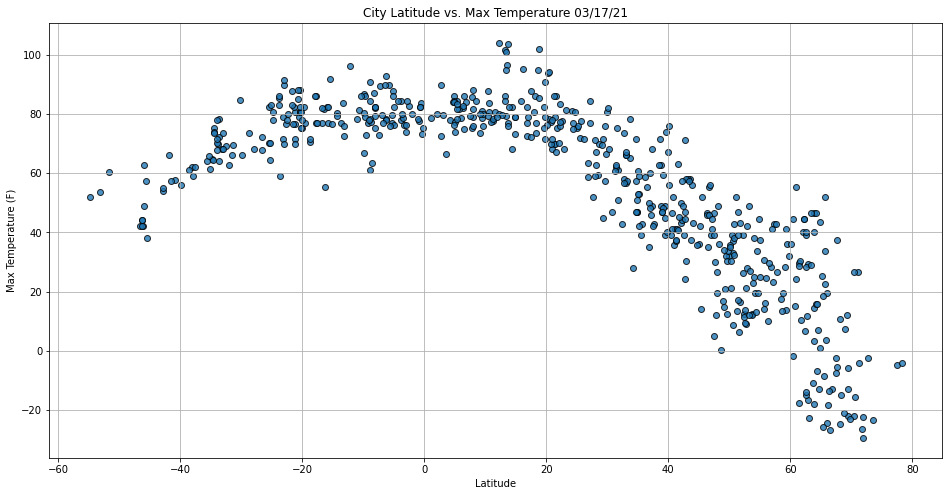

In [140]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.figure(figsize=(16,8))
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

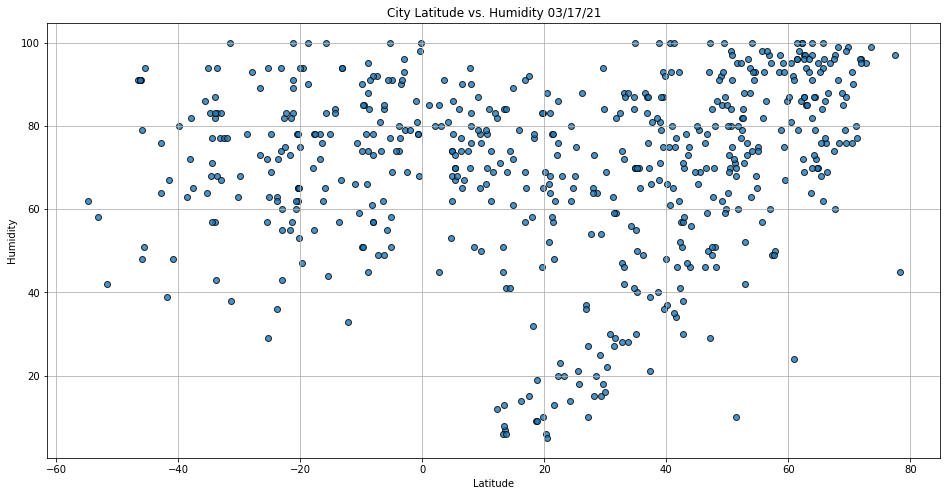

In [139]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.figure(figsize=(16,8))
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

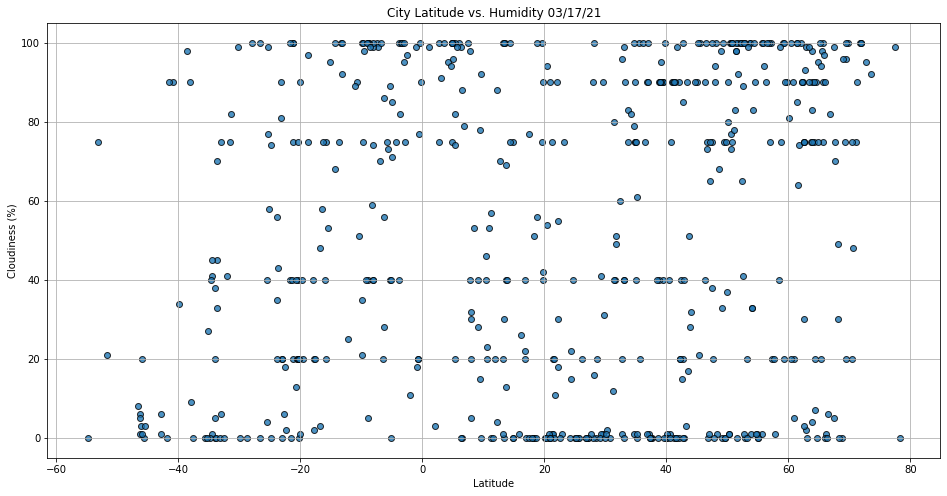

In [141]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.figure(figsize=(16,8))
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

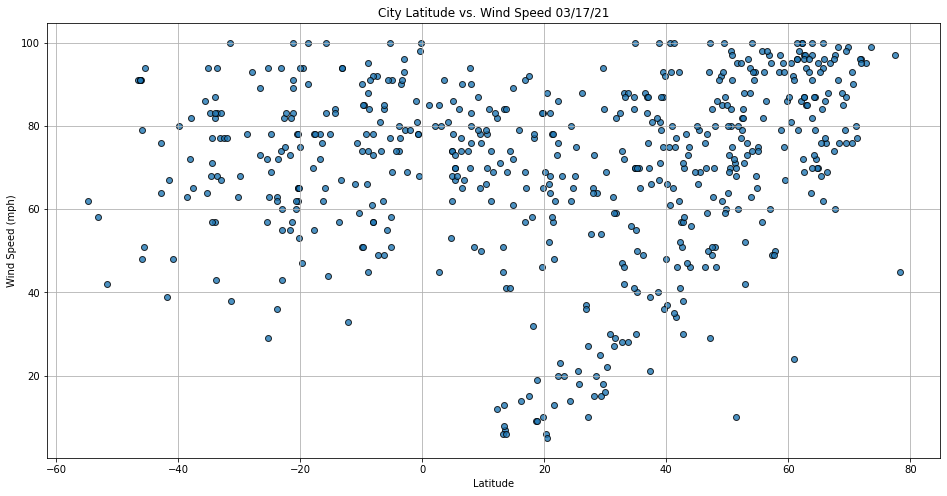

In [142]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.figure(figsize=(16,8))
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()